# Homoscedastic vs Heteroscedastic

[source](https://pierrelucbacon.com/mlbook/ch5-probabilistic/#r-gression-homosc-dastique-et-h-t-rosc-dastique)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm
from IPython.display import Image

from pathlib import Path

In [2]:
np.random.seed(42)
N = 100
# sample N points uniformly in [0.5, 9.5]
x_data = np.random.uniform(0.5, 9.5, N)

# mean y function
def f_mu(x):
    return 0.5 * x + 1.0

In [3]:
# homoscedastic
# fixed standard deviation
sigma_homo = 0.7
# generate y points for homo
y_homo = f_mu(x_data) + np.random.normal(0, sigma_homo, N)

# heteroscedastic
# variable standard deviation
def f_sigma(x):
    return 0.3 + 0.12 * x
# generate y points for hetero
y_hetero = f_mu(x_data) + np.random.normal(0, f_sigma(x_data))

In [4]:
# sample points evenly from 0 to 10
x_line = np.linspace(0, 10, 100)
# sample points evenly from -3 to 9
y_pdf_range = np.linspace(-3, 9, 200)
scale = 2.5

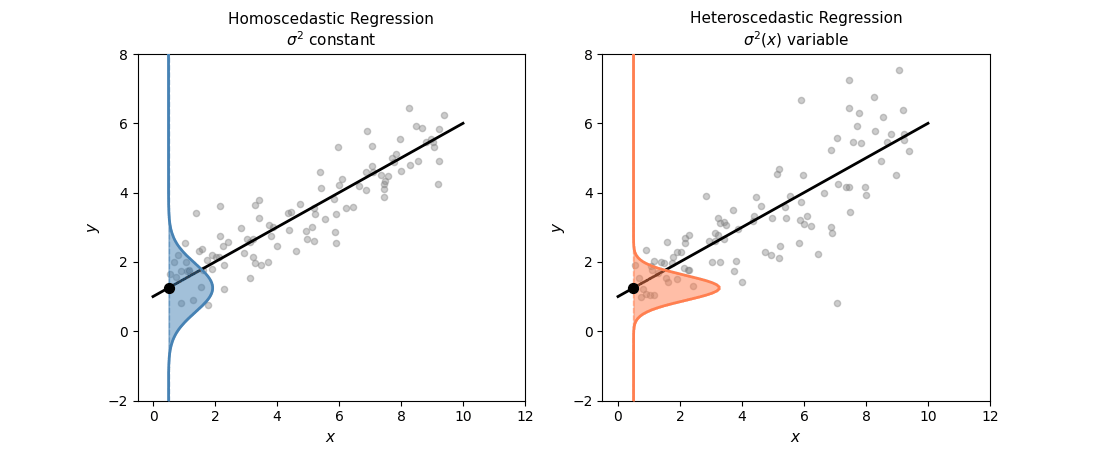

In [ ]:
# create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(11, 4.5))

frame_count = 60
x_min = 0.5
x_max = 9.5

# define initialization function for animation
def init():
    for ax in axs:
        ax.clear()
    return []

def animate(frame):
    # calculate x value from x_min to x_max linearly with frame idx
    x_current = x_min + (frame / (frame_count - 1)) * (x_max - x_min) # sweep from 0.5 to 9.5

    # each element
    # axis, y values, title, pdf color, st dev fn
    axs_data = [
        (axs[0], y_homo, 'Homoscedastic Regression', 'steelblue', lambda _: sigma_homo),
        (axs[1], y_hetero, 'Heteroscedastic Regression', 'coral', f_sigma)
    ]

    # for each axis
    for idx, (ax, y_data, title, color, get_sigma) in enumerate(axs_data):
        ax.clear()

        # plot the scatter data
        ax.scatter(x_data, y_data, alpha=0.4, s=20, c='gray', zorder=1)
        # plot the mean line
        ax.plot(x_line, f_mu(x_line), 'k-', linewidth=2, zorder=2)

        # calculate the current y value
        mu = f_mu(x_current)
        # calculate the current st dev
        sigma = get_sigma(x_current)
        # calculate pdf values
        pdf = norm.pdf(y_pdf_range, mu, sigma)

        # plot the pdf curve and fill it in
        ax.plot(x_current + scale * pdf, y_pdf_range, color=color, linewidth=2, zorder=4)
        ax.fill_betweenx(y_pdf_range, x_current, x_current + scale * pdf, alpha=0.5, color=color, zorder=3)
        
        # draw a vertical line indicating the current x value
        ax.axvline(x_current, color=color, linestyle='--', alpha=0.5, linewidth=1)
        
        # plot the current y value
        ax.scatter([x_current], [mu], color='black', s=50, zorder=5)
        
        ax.set_xlim(-0.5, 12)
        ax.set_ylim(-2, 8)
        ax.set_xlabel(r'$x$', fontsize=11)
        ax.set_ylabel(r'$y$', fontsize=11)
        sigma_label = r'$\sigma^2$ constant' if idx == 0 else r'$\sigma^2(x)$ variable'
        ax.set_title(f'{title}\n{sigma_label}', fontsize=11)

    return []

# run the animation
anim = FuncAnimation(fig, animate, init_func=init, frames=frame_count, interval=80, blit=True)

# save the animation as a GIF
notebook_dir = Path("2026_01_26_homoscedastic.ipynb").resolve().parent
static_dir = notebook_dir / "static"
anim.save(static_dir / 'regression_scedasticity.gif', writer='pillow', fps=12, dpi=100)
plt.close()

# Show the GIF
Image(filename=static_dir / 'regression_scedasticity.gif')